# 601 UK Road Traffic Collision Dataset

#### Data Source:
* Open Data website of the UK government
* Dataset: /kaggle/input/road-traffic-collision-dataset/accident_data.csv, /kaggle/input/road-traffic-collision-dataset/vehicle_data.csv

In [1]:
# Importing Packages
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

## Dataset Description 

In [2]:
#reading data into a dataframe
df1 = pd.read_csv(r'C:\Users\priya\Downloads\vehicle_data\vehicle_data.csv', encoding= 'unicode_escape')
df1

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177200,2016984131116,21 - 25,14.0,Urban area,NaN,1598.0,None,None,Not known,Mid Junction - on roundabout or on main road,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2016
2177201,2016984131116,56 - 65,NaN,Small town,NaN,1598.0,None,None,Commuting to/from work,Mid Junction - on roundabout or on main road,...,None,No tow/articulation,Offside,0.0,Going ahead other,2,Car,No,Front,2016
2177202,2016984131216,56 - 65,NaN,Urban area,3.0,NaN,None,Central crash barrier,Journey as part of work,Not at or within 20 metres of junction,...,None,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1,Goods 7.5 tonnes mgw and over,No,Offside,2016
2177203,2016984131316,16 - 20,13.0,Urban area,6.0,1796.0,None,Tree,Not known,Not at or within 20 metres of junction,...,Skidded,No tow/articulation,Offside,0.0,Going ahead other,1,Car,No,Front,2016


In [3]:
df1.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact', 'Year'],
      dtype='object')

In [4]:
df1.head().T

,0,1,2,3,4
Accident_Index,200401BS00001,200401BS00002,200401BS00003,200401BS00003,200401BS00004
Age_Band_of_Driver,26 - 35,26 - 35,26 - 35,66 - 75,26 - 35
Age_of_Vehicle,3.0,NaN,4.0,NaN,1.0
Driver_Home_Area_Type,Urban area,Urban area,Data missing or out of range,Data missing or out of range,Urban area
Driver_IMD_Decile,4.0,3.0,NaN,NaN,4.0
Engine_Capacity_.CC.,1588.0,NaN,998.0,NaN,124.0
Hit_Object_in_Carriageway,None,None,None,None,None
Hit_Object_off_Carriageway,None,None,None,None,None
Journey_Purpose_of_Driver,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range
Junction_Location,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range


In [5]:
#Reading the dataset into frame
df2 = pd.read_csv(r'C:\Users\priya\Downloads\accident_data\accident_data.csv')
df2

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,A,95.0,NaN,0.0,Slight,None,18/02/2010,Thursday,1.0,...,Northern,Dry,Single carriageway,None,60,07:00,Rural,Fine no high winds,2010,Yes
1048571,201091NM01881,A,95.0,NaN,0.0,Slight,None,21/02/2010,Sunday,1.0,...,Northern,Frost or ice,Single carriageway,None,60,03:00,Rural,Fine no high winds,2010,Yes
1048572,201091NM01935,A,96.0,Unclassified,0.0,Slight,None,23/02/2010,Tuesday,1.0,...,Northern,Frost or ice,Single carriageway,None,30,09:38,Rural,Fine no high winds,2010,Yes
1048573,201091NM01964,A,9.0,Unclassified,0.0,Serious,None,23/02/2010,Tuesday,1.0,...,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes


In [6]:
df2.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [7]:
df2.head().T

,0,1,2,3,4
Accident_Index,200501BS00001,200501BS00002,200501BS00003,200501BS00004,200501BS00005
1st_Road_Class,A,B,C,A,NaN
1st_Road_Number,3218.0,450.0,0.0,3220.0,0.0
2nd_Road_Class,NaN,C,NaN,NaN,NaN
2nd_Road_Number,0.0,0.0,0.0,0.0,0.0
Accident_Severity,Serious,Slight,Slight,Slight,Slight
Carriageway_Hazards,None,None,None,None,None
Date,04/01/2005,05/01/2005,06/01/2005,07/01/2005,10/01/2005
Day_of_Week,Tuesday,Wednesday,Thursday,Friday,Monday
Did_Police_Officer_Attend_Scene_of_Accident,1.0,1.0,1.0,1.0,1.0


In [8]:
#Merging 2 datasets into 1 dataframe 
df = pd.merge(df1, df2, left_on = 'Accident_Index', right_on = 'Accident_Index', how='inner')
df

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528330,201034NK23180,36 - 45,3.0,Urban area,1.0,1248.0,None,None,Journey as part of work,Approaching junction or waiting/parked at junc...,...,Northamptonshire,Dry,Single carriageway,None,30,10:20,Urban,Fine no high winds,2010,No
528331,201034NK23410,Data missing or out of range,NaN,Data missing or out of range,NaN,NaN,None,None,Journey as part of work,Mid Junction - on roundabout or on main road,...,Northamptonshire,Wet or damp,Single carriageway,None,30,12:00,Rural,Raining no high winds,2010,No
528332,201034NK23410,36 - 45,8.0,Urban area,3.0,1360.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,...,Northamptonshire,Wet or damp,Single carriageway,None,30,12:00,Rural,Raining no high winds,2010,No
528333,201034NK23890,56 - 65,8.0,Urban area,8.0,1951.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,...,Northamptonshire,Dry,Single carriageway,None,30,13:07,Urban,Raining no high winds,2010,No


# Cleaning

In [9]:
df.shape

(528335, 57)

In [10]:
df.dtypes

Accident_Index                                  object
Age_Band_of_Driver                              object
Age_of_Vehicle                                 float64
Driver_Home_Area_Type                           object
Driver_IMD_Decile                              float64
Engine_Capacity_.CC.                           float64
Hit_Object_in_Carriageway                       object
Hit_Object_off_Carriageway                      object
Journey_Purpose_of_Driver                       object
Junction_Location                               object
make                                            object
model                                           object
Propulsion_Code                                 object
Sex_of_Driver                                   object
Skidding_and_Overturning                        object
Towing_and_Articulation                         object
Vehicle_Leaving_Carriageway                     object
Vehicle_Location.Restricted_Lane               float64
Vehicle_Ma

In [11]:
df.describe(include='object').T

,count,unique,top,freq
Accident_Index,528335,403235,2009559D05333,22
Age_Band_of_Driver,528335,12,36 - 45,115777
Driver_Home_Area_Type,528335,4,Urban area,361204
Hit_Object_in_Carriageway,528335,13,None,506767
Hit_Object_off_Carriageway,528335,12,None,482965
Journey_Purpose_of_Driver,528335,6,Other/Not known (2005-10),348438
Junction_Location,528335,10,Not at or within 20 metres of junction,198077
make,528335,408,VAUXHALL,58829
model,452717,19749,CLIO DYNAMIQUE 16V,2626
Propulsion_Code,491092,9,Petrol,299655


In [12]:
#Creating a new datset for analysing data
d_subset = df[['Light_Conditions','Accident_Index','Accident_Severity','Date','Day_of_Week','Number_of_Casualties','Road_Surface_Conditions','Road_Type','Speed_limit','Time','Urban_or_Rural_Area', 'Weather_Conditions','Year_x','Hit_Object_in_Carriageway','Hit_Object_off_Carriageway']].copy()
d_subset

,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
0,Darkness - lights lit,200501BS00002,Slight,05/01/2005,Wednesday,1,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,None,None
1,Darkness - lights lit,200501BS00003,Slight,06/01/2005,Thursday,1,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,Parked vehicle,None
2,NaN,200501BS00004,Slight,07/01/2005,Friday,1,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,None,None
3,Darkness - lighting unknown,200501BS00005,Slight,10/01/2005,Monday,1,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,Kerb,None
4,NaN,200501BS00006,Slight,11/01/2005,Tuesday,1,Wet or damp,Single carriageway,30,12:40,Urban,Raining no high winds,2005,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528330,Daylight,201034NK23180,Slight,09/06/2010,Wednesday,1,Dry,Single carriageway,30,10:20,Urban,Fine no high winds,2010,None,None
528331,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None
528332,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None
528333,Daylight,201034NK23890,Slight,10/06/2010,Thursday,1,Dry,Single carriageway,30,13:07,Urban,Raining no high winds,2010,None,None


In [13]:
d_subset

,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
0,Darkness - lights lit,200501BS00002,Slight,05/01/2005,Wednesday,1,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,None,None
1,Darkness - lights lit,200501BS00003,Slight,06/01/2005,Thursday,1,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,Parked vehicle,None
2,NaN,200501BS00004,Slight,07/01/2005,Friday,1,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,None,None
3,Darkness - lighting unknown,200501BS00005,Slight,10/01/2005,Monday,1,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,Kerb,None
4,NaN,200501BS00006,Slight,11/01/2005,Tuesday,1,Wet or damp,Single carriageway,30,12:40,Urban,Raining no high winds,2005,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528330,Daylight,201034NK23180,Slight,09/06/2010,Wednesday,1,Dry,Single carriageway,30,10:20,Urban,Fine no high winds,2010,None,None
528331,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None
528332,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None
528333,Daylight,201034NK23890,Slight,10/06/2010,Thursday,1,Dry,Single carriageway,30,13:07,Urban,Raining no high winds,2010,None,None


In [14]:
#Renaming the column name
d_subset.rename(columns={'Year_x': 'Year'}, inplace=True)
d_subset

,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
0,Darkness - lights lit,200501BS00002,Slight,05/01/2005,Wednesday,1,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,None,None
1,Darkness - lights lit,200501BS00003,Slight,06/01/2005,Thursday,1,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,Parked vehicle,None
2,NaN,200501BS00004,Slight,07/01/2005,Friday,1,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,None,None
3,Darkness - lighting unknown,200501BS00005,Slight,10/01/2005,Monday,1,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,Kerb,None
4,NaN,200501BS00006,Slight,11/01/2005,Tuesday,1,Wet or damp,Single carriageway,30,12:40,Urban,Raining no high winds,2005,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528330,Daylight,201034NK23180,Slight,09/06/2010,Wednesday,1,Dry,Single carriageway,30,10:20,Urban,Fine no high winds,2010,None,None
528331,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None
528332,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None
528333,Daylight,201034NK23890,Slight,10/06/2010,Thursday,1,Dry,Single carriageway,30,13:07,Urban,Raining no high winds,2010,None,None


In [15]:
d_subset.describe(include='all')

,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
count,527088,528335,528335,528335,528335,528335.000000,527607,525341,528335.000000,528333,528315,519780,528335.000000,528335,528335
unique,5,403235,3,2191,7,NaN,5,5,NaN,1439,3,8,NaN,13,12
top,Daylight,2009559D05333,Slight,06/10/2009,Friday,NaN,Dry,Single carriageway,NaN,17:00,Urban,Fine no high winds,NaN,None,None
freq,395331,22,457171,503,87592,NaN,360938,380113,NaN,4638,349808,421099,NaN,506767,482965
mean,NaN,NaN,NaN,NaN,NaN,1.453441,NaN,NaN,39.308441,NaN,NaN,NaN,2007.789590,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.955524,NaN,NaN,14.290866,NaN,NaN,NaN,1.716688,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,10.000000,NaN,NaN,NaN,2005.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,2006.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,50.000000,NaN,NaN,NaN,2009.000000,NaN,NaN


In [16]:
#Displaying each column unique values count
d_subset.nunique()

Light_Conditions                   5
Accident_Index                403235
Accident_Severity                  3
Date                            2191
Day_of_Week                        7
Number_of_Casualties              33
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                3
Weather_Conditions                 8
Year                               6
Hit_Object_in_Carriageway         13
Hit_Object_off_Carriageway        12
dtype: int64

In [17]:
d_subset.dtypes

Light_Conditions              object
Accident_Index                object
Accident_Severity             object
Date                          object
Day_of_Week                   object
Number_of_Casualties           int64
Road_Surface_Conditions       object
Road_Type                     object
Speed_limit                    int64
Time                          object
Urban_or_Rural_Area           object
Weather_Conditions            object
Year                           int64
Hit_Object_in_Carriageway     object
Hit_Object_off_Carriageway    object
dtype: object

In [18]:
#Changing datatypes
d_subset.Light_Conditions = d_subset.Light_Conditions.astype('string')
d_subset.Accident_Index = d_subset.Accident_Index.astype('string')
d_subset.Accident_Severity = d_subset.Accident_Severity.astype('string')
d_subset.Day_of_Week = d_subset.Day_of_Week.astype('string')
d_subset.Road_Surface_Conditions = d_subset.Road_Surface_Conditions.astype('string')
d_subset.Road_Type = d_subset.Road_Type.astype('string')
d_subset.Speed_limit = d_subset.Speed_limit.astype('int64')
d_subset.Urban_or_Rural_Area = d_subset.Urban_or_Rural_Area.astype('string')
d_subset.Weather_Conditions = d_subset.Weather_Conditions.astype('string')

In [19]:
#Displaying the correlation 
d_subset_corr = d_subset.corr()
d_subset_corr

,Number_of_Casualties,Speed_limit,Year
Number_of_Casualties,1.000000,0.148001,0.008273
Speed_limit,0.148001,1.000000,-0.031940
Year,0.008273,-0.031940,1.000000


# Analysis of missing values

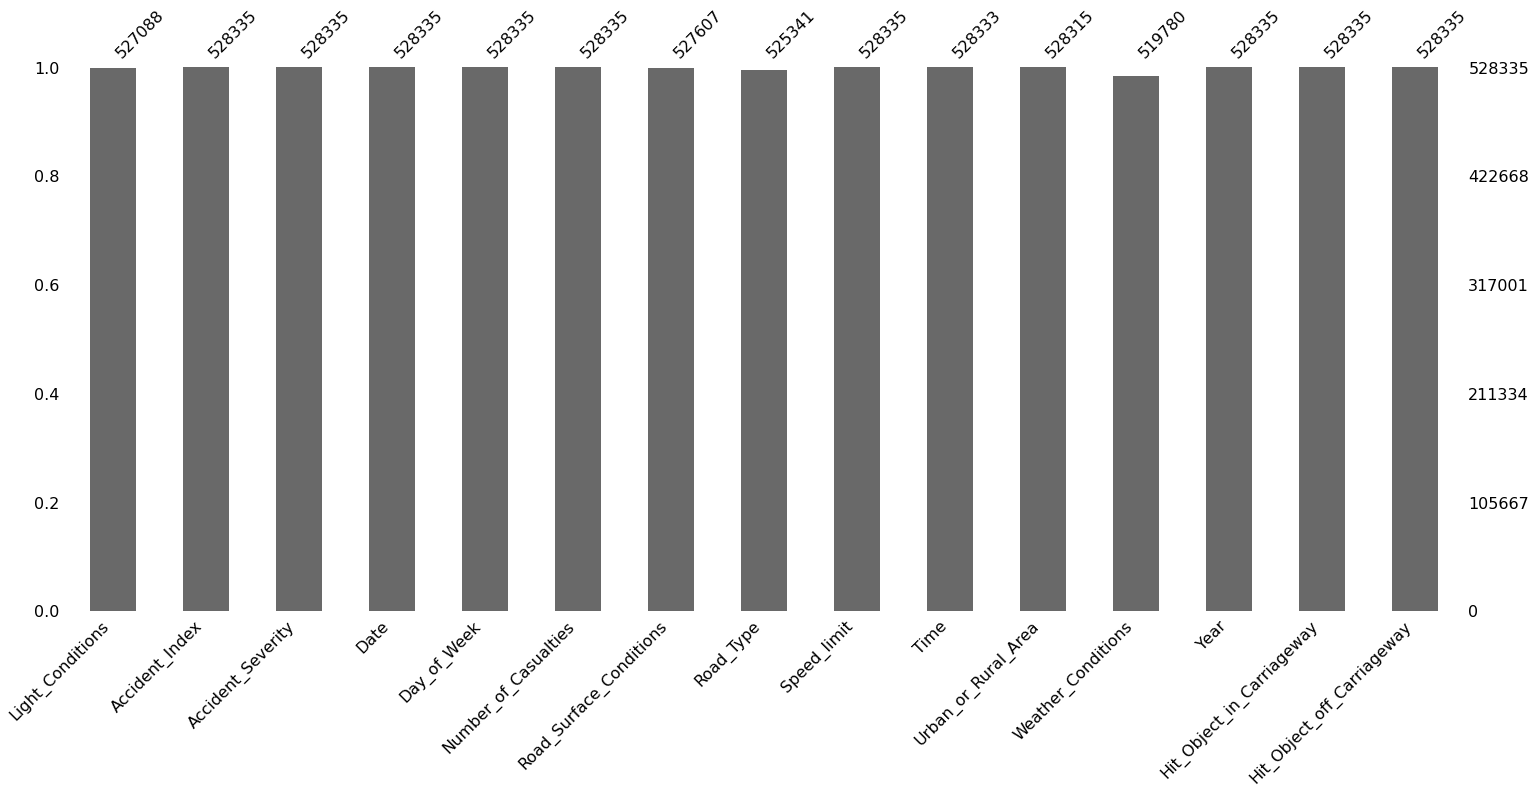

In [20]:
msno.bar(d_subset)
plt.show()

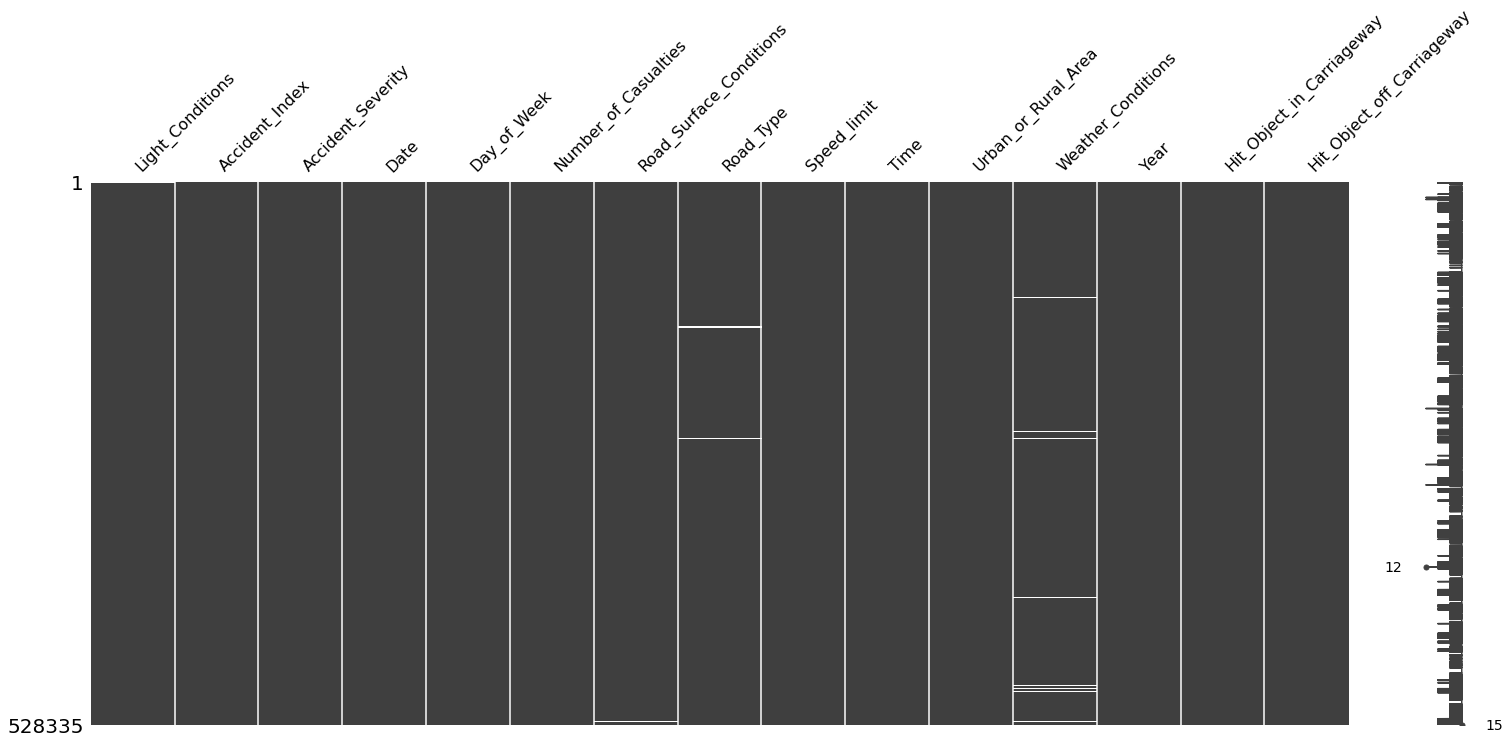

In [21]:
msno.matrix(d_subset)
plt.show()

# Handling Missing Values

In [22]:
#Checking for null values in each column
d_subset.isnull().sum()

Light_Conditions              1247
Accident_Index                   0
Accident_Severity                0
Date                             0
Day_of_Week                      0
Number_of_Casualties             0
Road_Surface_Conditions        728
Road_Type                     2994
Speed_limit                      0
Time                             2
Urban_or_Rural_Area             20
Weather_Conditions            8555
Year                             0
Hit_Object_in_Carriageway        0
Hit_Object_off_Carriageway       0
dtype: int64

In [23]:
#Filling the missing values in dataset
d_subset['Light_Conditions'] = d_subset['Light_Conditions'].fillna('No data available')
d_subset['Road_Surface_Conditions'] = d_subset['Road_Surface_Conditions'].fillna('No data available')
d_subset['Urban_or_Rural_Area'] = d_subset['Urban_or_Rural_Area'].fillna('Unallocated')
d_subset['Weather_Conditions'] = d_subset['Weather_Conditions'].fillna('Other')
d_subset['Road_Type'] = d_subset['Road_Type'].fillna('No data available')
d_subset['Time'] = d_subset['Time'].fillna('00:00')

In [24]:
#Dataset after filling with missing values
d_subset.isnull().sum()

Light_Conditions              0
Accident_Index                0
Accident_Severity             0
Date                          0
Day_of_Week                   0
Number_of_Casualties          0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Year                          0
Hit_Object_in_Carriageway     0
Hit_Object_off_Carriageway    0
dtype: int64

# Sanity Checks

Checking duplicate values

In [25]:
d_subset['Accident_Index'].value_counts().sort_values()

200645SP85508     1
200904AM09043     1
200904AM09039     1
200845WA17785     1
200904AM09025     1
                 ..
201006L040187    11
201005DD02390    11
201006XP26465    12
200911NE16289    14
2009559D05333    22
Name: Accident_Index, Length: 403235, dtype: Int64

In [26]:
# dropping duplicates from dataframe by taking App column into consideration
d_subset = d_subset.drop_duplicates(subset=["Accident_Index"])
d_subset

,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
0,Darkness - lights lit,200501BS00002,Slight,05/01/2005,Wednesday,1,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,None,None
1,Darkness - lights lit,200501BS00003,Slight,06/01/2005,Thursday,1,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,Parked vehicle,None
2,No data available,200501BS00004,Slight,07/01/2005,Friday,1,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,None,None
3,Darkness - lighting unknown,200501BS00005,Slight,10/01/2005,Monday,1,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,Kerb,None
4,No data available,200501BS00006,Slight,11/01/2005,Tuesday,1,Wet or damp,Single carriageway,30,12:40,Urban,Raining no high winds,2005,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528326,Daylight,201034NK21640,Slight,28/05/2010,Friday,1,Dry,Single carriageway,30,08:20,Rural,Fine no high winds,2010,None,None
528327,Daylight,201034NK22760,Serious,04/06/2010,Friday,1,Dry,Dual carriageway,30,12:10,Urban,Fine no high winds,2010,None,None
528329,Daylight,201034NK23180,Slight,09/06/2010,Wednesday,1,Dry,Single carriageway,30,10:20,Urban,Fine no high winds,2010,None,None
528331,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None


In [27]:
d_subset['Accident_Index'].value_counts().sort_values()

200501BS00002    1
200904TA09044    1
200904TA09043    1
200904TA09042    1
200904TA09041    1
                ..
200701ZD65190    1
200701ZD65167    1
200701ZD65086    1
200701ZD64875    1
201034NK23890    1
Name: Accident_Index, Length: 403235, dtype: Int64

<AxesSubplot:>

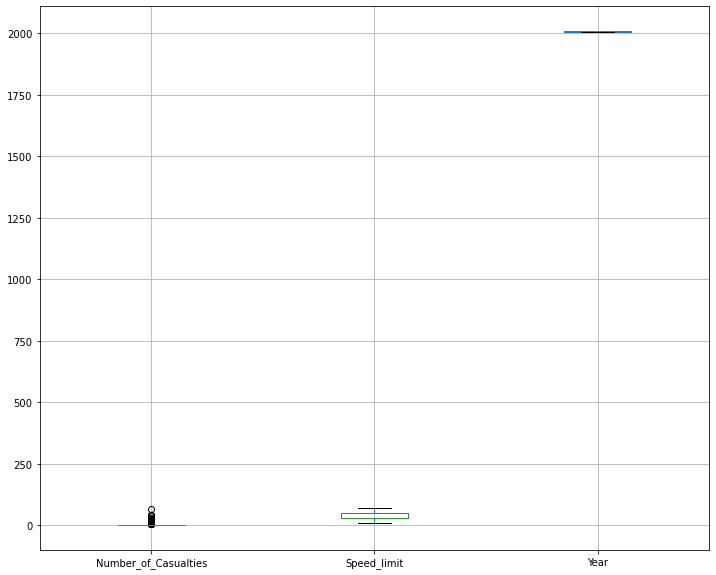

In [28]:
#Checking for outliers using boxplot
plt.figure(figsize=(12,10))
d_subset.boxplot()

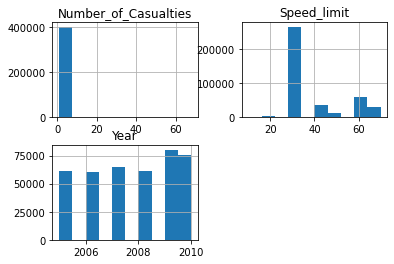

In [29]:
#Checking for outliers using histogram
d_subset.hist()
plt.show()

# Visualization

### Problem Statements:

1. When are most accidents occur in daylight or darkness
2. What is the grade of severity of accidents across the country?
3. Which days do most accidents occur?
4. What time most accidents occur?
5. What is the number of casualties happening incidents?
6. Does accidents occur more in Urban or rural locality?
7. Does accidents depends on the surface of area?


## Analyze accidents based on light

### Problem statement: When are most accidents occur in daylight or darkness

In [30]:
#Displaying the unique values in Light_Conditions column
d_subset['Light_Conditions'].unique()

<StringArray>
[      'Darkness - lights lit',           'No data available',
 'Darkness - lighting unknown',     'Darkness - lights unlit',
                    'Daylight',      'Darkness - no lighting']
Length: 6, dtype: string

In [31]:
#Copying columns into a new dataframe 
lc=d_subset[['Light_Conditions','Accident_Index']].copy()
lc

,Light_Conditions,Accident_Index
0,Darkness - lights lit,200501BS00002
1,Darkness - lights lit,200501BS00003
2,No data available,200501BS00004
3,Darkness - lighting unknown,200501BS00005
4,No data available,200501BS00006
...,...,...
528326,Daylight,201034NK21640
528327,Daylight,201034NK22760
528329,Daylight,201034NK23180
528331,Daylight,201034NK23410


In [32]:
#Sorting the data
lc1=lc.groupby('Light_Conditions').size()
lc1=lc1.sort_values()

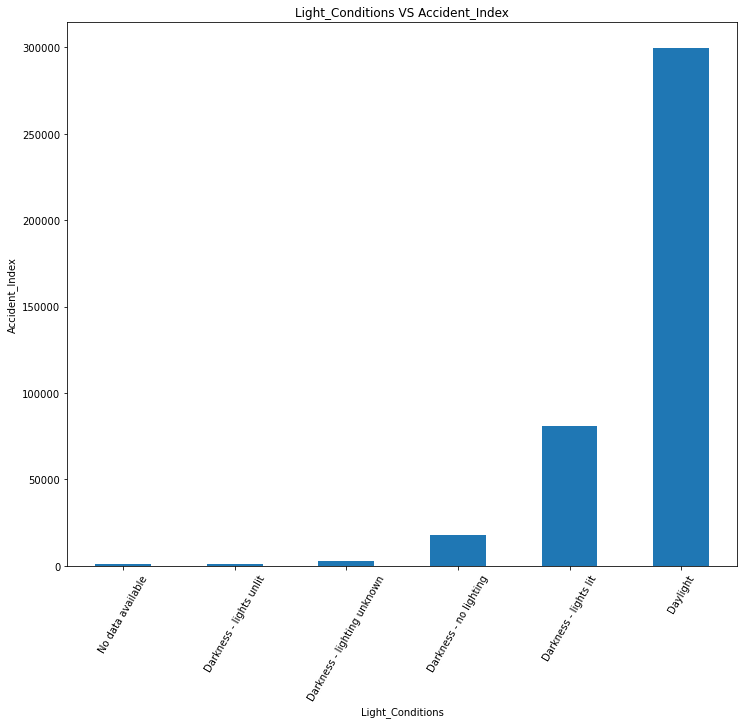

In [33]:
#Building a bar plot for displaying light/darkness data
plt.figure(figsize=(12,10))
lc1.plot(kind="bar")
plt.xlabel('Light_Conditions')
plt.ylabel('Accident_Index')
plt.xticks(rotation=60)
plt.title('Light_Conditions VS Accident_Index')
plt.show()

* Based on the graph, More accidents are happending on daylight than darkness

## Analyze Accident Severity

### Problem Statement: What is the grade of severity of accidents across the country?

In [34]:
#Displaying the unique values
d_subset['Accident_Severity'].unique()


<StringArray>
['Slight', 'Serious', 'Fatal']
Length: 3, dtype: string

In [35]:
#creating a new dataframe
sl=d_subset[['Accident_Severity','Accident_Index']].copy()
sl

,Accident_Severity,Accident_Index
0,Slight,200501BS00002
1,Slight,200501BS00003
2,Slight,200501BS00004
3,Slight,200501BS00005
4,Slight,200501BS00006
...,...,...
528326,Slight,201034NK21640
528327,Serious,201034NK22760
528329,Slight,201034NK23180
528331,Slight,201034NK23410


In [36]:
#Sorting the Accident_Severity data
sl1=sl.groupby('Accident_Severity').size()
sl1=sl1.sort_values()

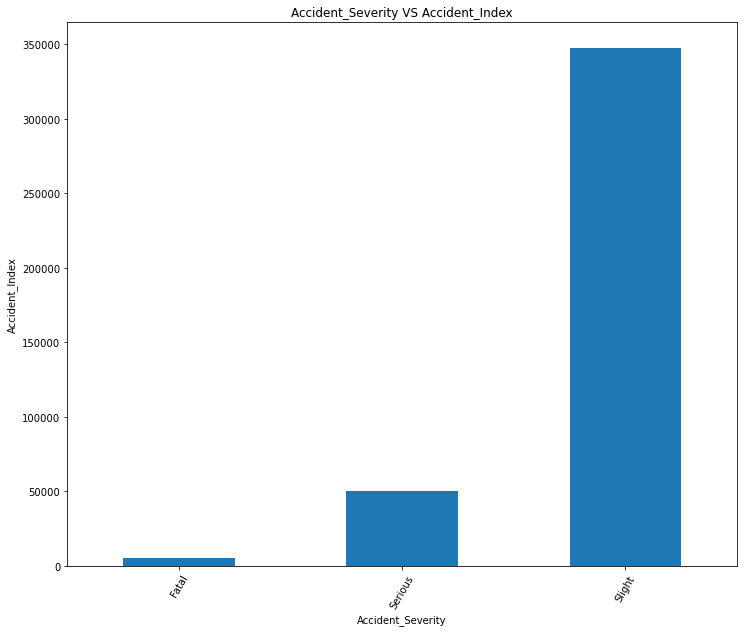

In [37]:
#visualization of Accident_Severity in bar plot
plt.figure(figsize=(12,10))
sl1.plot(kind="bar")
plt.xlabel('Accident_Severity')
plt.ylabel('Accident_Index')
plt.title('Accident_Severity VS Accident_Index')
plt.xticks(rotation=60)
plt.show()

* Based on the graph, More slight accidents are happening in UK, followed by serious and fatal 

## Analyze Date and Time

### Problem statement: Which days do most accidents occur?

In [38]:
#C
d_subset['Date']

0         05/01/2005
1         06/01/2005
2         07/01/2005
3         10/01/2005
4         11/01/2005
             ...    
528326    28/05/2010
528327    04/06/2010
528329    09/06/2010
528331    08/06/2010
528333    10/06/2010
Name: Date, Length: 403235, dtype: object

In [39]:
#Checking for null values
d_subset['Date'].isna().sum()

0

In [40]:
d_subset['Time']

0         17:36
1         00:15
2         10:35
3         21:13
4         12:40
          ...  
528326    08:20
528327    12:10
528329    10:20
528331    12:00
528333    13:07
Name: Time, Length: 403235, dtype: object

In [41]:
d_subset['Time'].dtypes

dtype('O')

In [42]:
#Checking for null values
d_subset['Time'].isna().sum()

0

In [43]:
#Droping null values
d_subset['Time'].dropna(inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_27256\3633783964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_subset['Time'].dropna(inplace=True)


In [44]:
d_subset.dtypes

Light_Conditions              string
Accident_Index                string
Accident_Severity             string
Date                          object
Day_of_Week                   string
Number_of_Casualties           int64
Road_Surface_Conditions       string
Road_Type                     string
Speed_limit                    int64
Time                          object
Urban_or_Rural_Area           string
Weather_Conditions            string
Year                           int64
Hit_Object_in_Carriageway     object
Hit_Object_off_Carriageway    object
dtype: object

In [45]:
#Joining both "Date","Time" into one column
cols=["Date","Time"]
d_subset['date_time'] = d_subset[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")
d_subset

C:\Users\priya\AppData\Local\Temp\ipykernel_27256\1076154164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_subset['date_time'] = d_subset[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")


,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,date_time
0,Darkness - lights lit,200501BS00002,Slight,05/01/2005,Wednesday,1,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,None,None,05/01/2005 17:36
1,Darkness - lights lit,200501BS00003,Slight,06/01/2005,Thursday,1,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,Parked vehicle,None,06/01/2005 00:15
2,No data available,200501BS00004,Slight,07/01/2005,Friday,1,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,None,None,07/01/2005 10:35
3,Darkness - lighting unknown,200501BS00005,Slight,10/01/2005,Monday,1,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,Kerb,None,10/01/2005 21:13
4,No data available,200501BS00006,Slight,11/01/2005,Tuesday,1,Wet or damp,Single carriageway,30,12:40,Urban,Raining no high winds,2005,None,None,11/01/2005 12:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528326,Daylight,201034NK21640,Slight,28/05/2010,Friday,1,Dry,Single carriageway,30,08:20,Rural,Fine no high winds,2010,None,None,28/05/2010 08:20
528327,Daylight,201034NK22760,Serious,04/06/2010,Friday,1,Dry,Dual carriageway,30,12:10,Urban,Fine no high winds,2010,None,None,04/06/2010 12:10
528329,Daylight,201034NK23180,Slight,09/06/2010,Wednesday,1,Dry,Single carriageway,30,10:20,Urban,Fine no high winds,2010,None,None,09/06/2010 10:20
528331,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,None,None,08/06/2010 12:00


In [46]:
d_subset.dtypes

Light_Conditions              string
Accident_Index                string
Accident_Severity             string
Date                          object
Day_of_Week                   string
Number_of_Casualties           int64
Road_Surface_Conditions       string
Road_Type                     string
Speed_limit                    int64
Time                          object
Urban_or_Rural_Area           string
Weather_Conditions            string
Year                           int64
Hit_Object_in_Carriageway     object
Hit_Object_off_Carriageway    object
date_time                     object
dtype: object

In [47]:
#Checking for null values
d_subset['date_time'].isnull().sum()

0

In [48]:
#Changing the datatye
d_subset['date_time'] = pd.to_datetime(d_subset['date_time'])

C:\Users\priya\AppData\Local\Temp\ipykernel_27256\1422404603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_subset['date_time'] = pd.to_datetime(d_subset['date_time'])


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


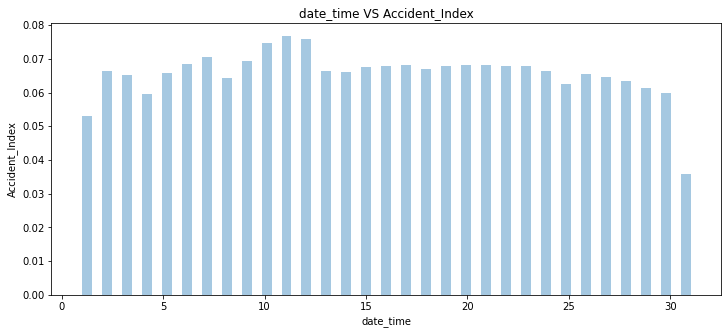

In [49]:
#Visualizing the based on the date
plt.figure(figsize=(12,5))
plt.xlabel('date_time')
plt.ylabel('Accident_Index')
plt.title('date_time VS Accident_Index')
sns.distplot(d_subset.date_time.dt.day, bins=61, kde=False, norm_hist=True)
plt.show()

### What time most accidents occur?

* Based on graph, Maximum accidents are happening between 10 and 15 days.

<AxesSubplot:title={'center':'Day VS Accident_Index'}, xlabel='date_time', ylabel='Accident_Index'>

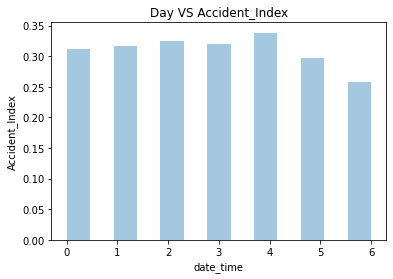

In [50]:
plt.xlabel('Day')
plt.ylabel('Accident_Index')
plt.title('Day VS Accident_Index')
sns.distplot(d_subset.date_time.dt.day_of_week, bins=13, kde=False, norm_hist=True)

* According to graph, Maximum accidents on Friday

## Analyze number of casualties

### Problem statement: What is the number of casualties happening incidents?

In [51]:
#Displaying unique values
d_subset['Number_of_Casualties'].unique()

array([ 1,  2,  4,  3,  5,  6,  7, 10,  9,  8, 17, 13, 19, 11, 15, 12, 14,
       23, 18, 21, 22, 26, 16, 40, 25, 28, 29, 42, 68, 27, 32, 43, 24],
      dtype=int64)

In [52]:
#Creating new dataset
c1=d_subset[['Number_of_Casualties','Accident_Index']].copy()
c1

,Number_of_Casualties,Accident_Index
0,1,200501BS00002
1,1,200501BS00003
2,1,200501BS00004
3,1,200501BS00005
4,1,200501BS00006
...,...,...
528326,1,201034NK21640
528327,1,201034NK22760
528329,1,201034NK23180
528331,1,201034NK23410


In [53]:
#sorting the data
c1=c1.groupby('Number_of_Casualties').size()
c1=c1.sort_values()

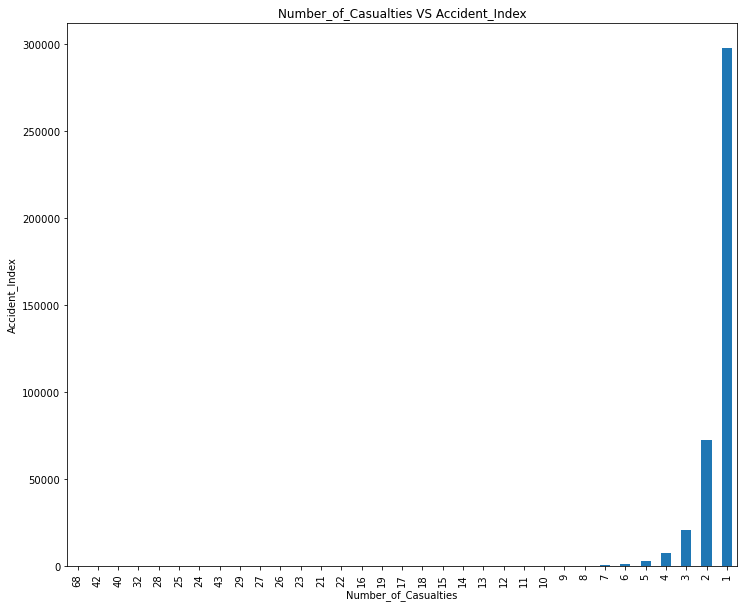

In [54]:
#Visualizing the data
plt.figure(figsize=(12,10))
c1.plot(kind="bar")
plt.xlabel('Number_of_Casualties')
plt.ylabel('Accident_Index')
plt.title('Number_of_Casualties VS Accident_Index')
plt.xticks(rotation=90)
plt.show()

* Based on the garph, most count of Casualties consists of 1.

# Analyze on locality

### Problem Statement: Does accidents occur more in Urban or rural locality?

In [55]:
#Displaying unique values
d_subset['Urban_or_Rural_Area'].unique()

<StringArray>
['Urban', 'Rural', 'Unallocated']
Length: 3, dtype: string

In [56]:
#creating new dataset
ur=d_subset[['Urban_or_Rural_Area','Accident_Index']].copy()
ur

,Urban_or_Rural_Area,Accident_Index
0,Urban,200501BS00002
1,Urban,200501BS00003
2,Urban,200501BS00004
3,Urban,200501BS00005
4,Urban,200501BS00006
...,...,...
528326,Rural,201034NK21640
528327,Urban,201034NK22760
528329,Urban,201034NK23180
528331,Rural,201034NK23410


In [57]:
#Sorting the dataset
ur1=ur.groupby('Urban_or_Rural_Area').size()
ur1=ur1.sort_values()

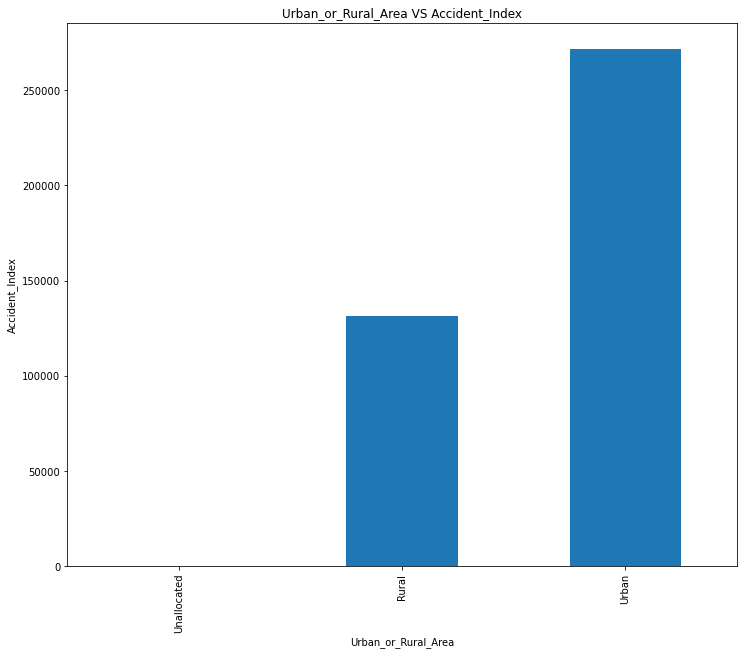

In [58]:
#visualizing the data
plt.figure(figsize=(12,10))
ur1.plot(kind="bar")
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Accident_Index')
plt.title('Urban_or_Rural_Area VS Accident_Index')
plt.xticks(rotation=90)
plt.show()

* Based on the garph, I believe due to traffic congesion most of the accidents are happening near urban areas

# Analyze on Surface conditions

### Problem Statement: Does accidents depends on the surface of area?

In [59]:
#Displaying unique values
d_subset['Road_Surface_Conditions'].unique()

<StringArray>
[                 'Dry',          'Wet or damp',                 'Snow',
         'Frost or ice', 'Flood over 3cm. deep',    'No data available']
Length: 6, dtype: string

In [60]:
#Create new dataframe
rs=d_subset[['Road_Surface_Conditions','Accident_Index']].copy()
rs

,Road_Surface_Conditions,Accident_Index
0,Dry,200501BS00002
1,Dry,200501BS00003
2,Dry,200501BS00004
3,Wet or damp,200501BS00005
4,Wet or damp,200501BS00006
...,...,...
528326,Dry,201034NK21640
528327,Dry,201034NK22760
528329,Dry,201034NK23180
528331,Wet or damp,201034NK23410


In [61]:
#Sorting the data
rs1=rs.groupby('Road_Surface_Conditions').size()
rs1=rs1.sort_values()

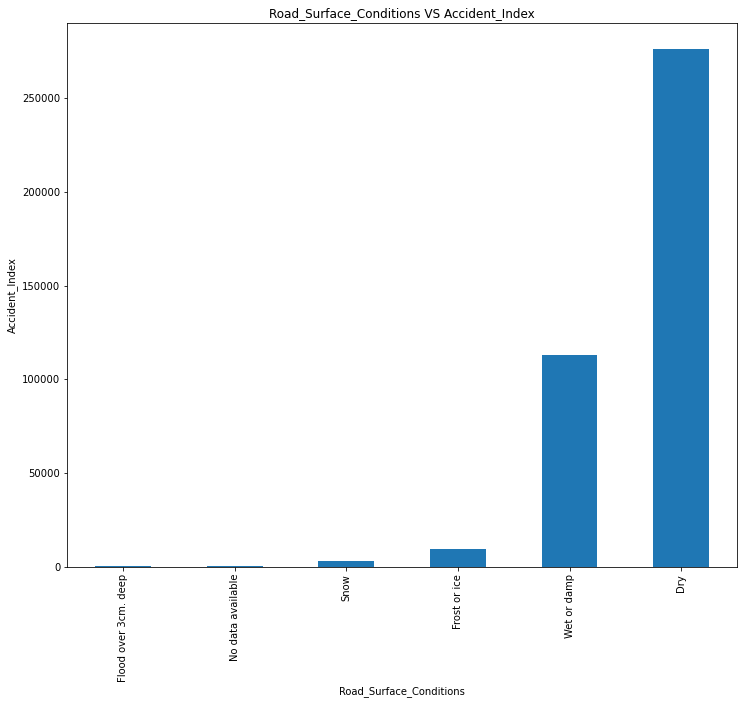

In [62]:
#Visualizing the data
plt.figure(figsize=(12,10))
rs1.plot(kind="bar")
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Accident_Index')
plt.title('Road_Surface_Conditions VS Accident_Index')
plt.xticks(rotation=90)
plt.show()

* Based on the graph, Most of the Accidents are happening on dry road.

# Statistical Analysis

In [63]:
cw=d_subset[['Hit_Object_in_Carriageway','Hit_Object_off_Carriageway']].copy()
cw

,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
0,None,None
1,Parked vehicle,None
2,None,None
3,Kerb,None
4,None,None
...,...,...
528326,None,None
528327,None,None
528329,None,None
528331,None,None


In [64]:
df1['Hit_Object_off_Carriageway'].unique()

array(['None', 'Other permanent object', 'Road sign or traffic signal',
       'Lamp post', 'Near/Offside crash barrier', 'Tree',
       'Bus stop or bus shelter', 'Central crash barrier',
       'Entered ditch', 'Telegraph or electricity pole',
       'Submerged in water', 'Data missing or out of range',
       'Wall or fence'], dtype=object)

In [65]:
df1['Hit_Object_in_Carriageway'].unique()

array(['None', 'Parked vehicle', 'Kerb', 'Previous accident',
       'Open door of vehicle', 'Bollard or refuge', 'Road works',
       'Other object', 'Bridge (roof)', 'Central island of roundabout',
       'Bridge (side)', 'Data missing or out of range',
       'Any animal (except ridden horse)'], dtype=object)

In [66]:
d_subset['Hit_Object_in_Carriageway'] =  [0 if i=='None' else 1 for i in d_subset['Hit_Object_in_Carriageway']]
d_subset['Hit_Object_off_Carriageway'] = [0 if i=='None' else 1 for i in d_subset['Hit_Object_off_Carriageway']]
d_subset

C:\Users\priya\AppData\Local\Temp\ipykernel_27256\3508522999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_subset['Hit_Object_in_Carriageway'] =  [0 if i=='None' else 1 for i in d_subset['Hit_Object_in_Carriageway']]
C:\Users\priya\AppData\Local\Temp\ipykernel_27256\3508522999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_subset['Hit_Object_off_Carriageway'] = [0 if i=='None' else 1 for i in d_subset['Hit_Object_off_Carriageway']]


,Light_Conditions,Accident_Index,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,date_time
0,Darkness - lights lit,200501BS00002,Slight,05/01/2005,Wednesday,1,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,0,0,2005-05-01 17:36:00
1,Darkness - lights lit,200501BS00003,Slight,06/01/2005,Thursday,1,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,1,0,2005-06-01 00:15:00
2,No data available,200501BS00004,Slight,07/01/2005,Friday,1,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,0,0,2005-07-01 10:35:00
3,Darkness - lighting unknown,200501BS00005,Slight,10/01/2005,Monday,1,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,1,0,2005-10-01 21:13:00
4,No data available,200501BS00006,Slight,11/01/2005,Tuesday,1,Wet or damp,Single carriageway,30,12:40,Urban,Raining no high winds,2005,0,0,2005-11-01 12:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528326,Daylight,201034NK21640,Slight,28/05/2010,Friday,1,Dry,Single carriageway,30,08:20,Rural,Fine no high winds,2010,0,0,2010-05-28 08:20:00
528327,Daylight,201034NK22760,Serious,04/06/2010,Friday,1,Dry,Dual carriageway,30,12:10,Urban,Fine no high winds,2010,0,0,2010-04-06 12:10:00
528329,Daylight,201034NK23180,Slight,09/06/2010,Wednesday,1,Dry,Single carriageway,30,10:20,Urban,Fine no high winds,2010,0,0,2010-09-06 10:20:00
528331,Daylight,201034NK23410,Slight,08/06/2010,Tuesday,1,Wet or damp,Single carriageway,30,12:00,Rural,Raining no high winds,2010,0,0,2010-08-06 12:00:00


In [67]:
df_io = d_subset[['Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway']].groupby(d_subset['date_time'].dt.date).sum() # this may be count if you are counting
df_io

,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway
date_time,,
2005-01-01,4,12
2005-01-02,6,11
2005-01-03,5,19
2005-01-04,6,12
2005-01-05,6,14
...,...,...
2010-12-27,13,15
2010-12-28,6,16
2010-12-29,5,13


In [68]:
in_Carriageway = df_io['Hit_Object_in_Carriageway']
off_Carriageway = df_io['Hit_Object_off_Carriageway']  
ttest_ind(in_Carriageway, off_Carriageway , equal_var=False)

Ttest_indResult(statistic=-55.84012986782037, pvalue=0.0)

## Summary

1. Most of the accidents are occuring in the daylight. It might be due to Fail to Pay Attention, Alcohol consumption, Drugs, Speeding. 
2. More slight accidents are happening in UK, followed by serious and fatal.
3. Maximum accidents are happening between 10 and 15 days and also most accidents are occuring on Friday.
4. Most count of Casualties consists of 1.
5. I believe due to traffic congesion most of the accidents are happening near urban areas.
6. Most of the Accidents are happening on dry road.
7. There is no corelation between Hit_Object_in_Carriageway and Hit_Object_off_Carriageway
